In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import  SkyCoord
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib import colormaps
import sys
sys.path.append('../analysis_scripts/tools/')
from plot_utils import *
from correlation import GreatCircleDistance
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
#load source catalog
df=pd.read_hdf("../data/all_sources_coords.h5", key = 'values')

In [3]:
print("The columns of the DataFrame are:")
print(df.columns)

The columns of the DataFrame are:
Index(['Input', 'Object', 'RA', 'DEC', 'Redshift', 'RA_deg', 'DEC_deg', 'D',
       'M_BH', 'Activity', 'Activity_new'],
      dtype='object')


In [4]:
#first we select only the sources visible by the PAO
mask_dec = df['DEC_deg'] <44.8
df_visible = df[mask_dec]

In [5]:
#now we also divide the Active from the quiescent sources
mask_activity = df_visible['Activity'] == True

df_visible_active = df_visible[mask_activity]
df_visible_quiescent = df_visible[~mask_activity]

In [6]:
print(len(df_visible_active),'+', len(df_visible_quiescent), '=', len(df_visible))

41 + 49 = 90


### Let's make some plots
We start just by plotting all the sources

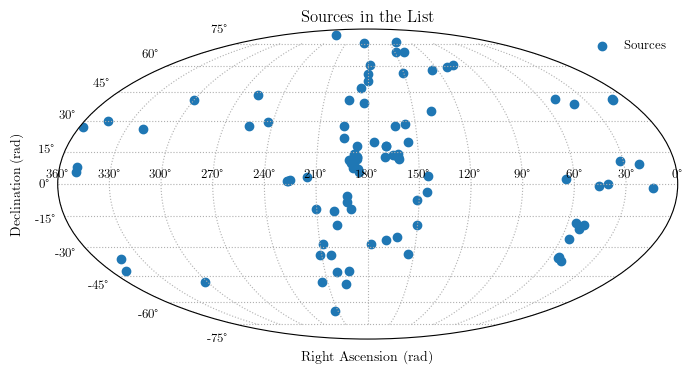

In [7]:
#the coordinates need to be in radians
#we adjust the coordinates in order to be able to plot with the R.A. axis going from 360 deg to 0 deg from left to right
ra_rad = np.deg2rad(df['RA_deg']-180)
dec_rad = np.deg2rad(df['DEC_deg'])

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection="mollweide")
ax.scatter(-ra_rad, dec_rad, label='Sources')  # Plot points
ax.grid(True)

# Customize x-ticks for 0–360 degrees
xticks = np.radians(np.linspace(-180, 180, 13))  # Tick locations in radians
xtick_labels = [f"{int(x)}°" for x in np.linspace(360, 0, 13)]  # Tick labels in degrees
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)  # Set the tick labels

plt.xlabel('Right Ascension (rad)')
plt.ylabel('Declination (rad)')
plt.title('Sources in the List')
plt.legend()
plt.savefig('plots/sources_distr.pdf', dpi = 300)

Now we also give a look at the distances

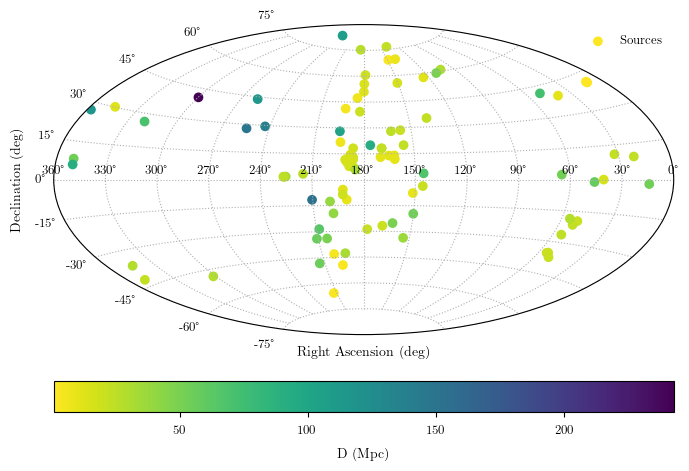

In [8]:
ra_rad = np.deg2rad(df['RA_deg']-180)
dec_rad = np.deg2rad(df['DEC_deg'])

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection="aitoff")  # Mollweide projection

# Create the scatter plot and save the mappable object
sc = ax.scatter(-ra_rad, dec_rad, c=df.D, cmap='viridis_r', label='Sources')

# Add the colorbar linked to the scatter plot
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('D (Mpc)')

# Customize x-ticks for 0–360 degrees
xticks = np.radians(np.linspace(-180, 180, 13))  # Tick locations in radians
xtick_labels = [f"{int(x)}°" for x in np.linspace(360, 0, 13)]  # Tick labels in degrees
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)  # Set the tick labels

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.legend()
ax.grid()
plt.savefig('plots/sources_distance.png')

It looks like the majority of the sources is aligned with the Supergalactic Plane (SGP). Let's prove it visually:

In [9]:
s_lon = np.linspace(0,2*np.pi, 50)
s_lat = np.zeros_like(s_lon)
s_lat_band_plus = np.ones_like(s_lon)*np.deg2rad(10)
s_lat_band_minus = np.ones_like(s_lon)*np.deg2rad(-10)
c_super = SkyCoord(sgl=s_lon*u.rad, sgb=s_lat*u.rad, frame = "supergalactic")
c_super_band_up = SkyCoord(sgl=s_lon*u.rad, sgb=s_lat_band_plus*u.rad, frame = "supergalactic")
c_super_band_down = SkyCoord(sgl=s_lon*u.rad, sgb=s_lat_band_minus*u.rad, frame = "supergalactic")

In [10]:
c_icrs = c_super.transform_to('icrs')
c_up = c_super_band_up.transform_to('icrs')
c_down = c_super_band_down.transform_to('icrs')

In [11]:
dec_sgp = np.append(c_icrs.dec.rad[-15:], c_icrs.dec.rad[0:-15])
rad_sgp = np.append(c_icrs.ra.rad[-15:], c_icrs.ra.rad[0:-15])
dec_sgp_up = np.append(c_up.dec.rad[-11:], c_up.dec.rad[0:-11])
ra_sgp_up = np.append(c_up.ra.rad[-11:], c_up.ra.rad[0:-11])
dec_sgp_down = np.append(c_down.dec.rad[-19:], c_down.dec.rad[0:-19])
ra_sgp_down = np.append(c_down.ra.rad[-19:], c_down.ra.rad[0:-19])


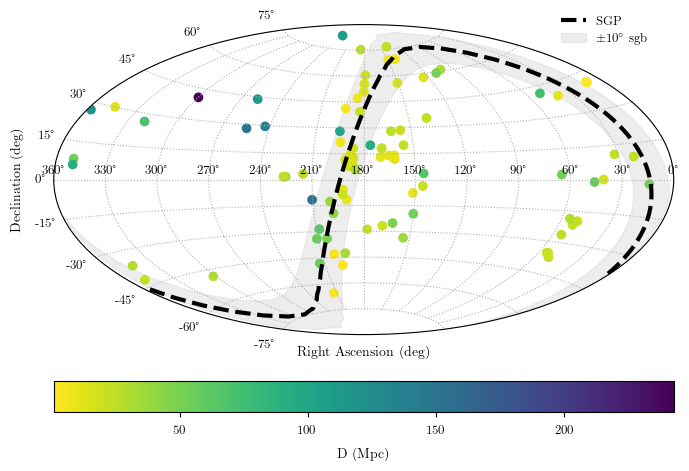

In [12]:
ra_rad = np.deg2rad(df['RA_deg']-180)
dec_rad = np.deg2rad(df['DEC_deg'])

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection="aitoff")  # projection

# Create the scatter plot and save the mappable object
sc = ax.scatter(-ra_rad, dec_rad, c=df.D, cmap='viridis_r')

#plot the SGP
ax.plot(-rad_sgp+np.pi, dec_sgp, c='k', ls = '--', label='SGP')
ax.fill(np.concatenate([-(ra_sgp_down - np.pi), -(ra_sgp_up[::-1] - np.pi)]), 
        np.concatenate([dec_sgp_down, dec_sgp_up[::-1]]), 
        color='gainsboro', alpha=0.5, zorder = 0, label = '$\pm 10^{\circ}$ sgb')

# Add the colorbar linked to the scatter plot
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('D (Mpc)')

# Customize x-ticks for 0–360 degrees
xticks = np.radians(np.linspace(-180, 180, 13))  # Tick locations in radians
xtick_labels = [f"{int(x)}°" for x in np.linspace(360, 0, 13)]  # Tick labels in degrees
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)  # Set the tick labels

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.legend(frameon = False, bbox_to_anchor = (0.8,0.9))
ax.grid()
plt.savefig('plots/sources_distance_with_SGP.png')

Count how many sources lay within the diplayed region of the SGP.

In [13]:

c_sources = SkyCoord(ra = df['RA'].values, dec = df["DEC"].values, frame = "icrs")
c_sources_sgp = c_sources.transform_to('supergalactic')

mask = np.absolute(c_sources_sgp.sgb.deg)<=10

df_sgp = df[mask]

print('The number of sources within 10 degrees from the SGP is', len(df_sgp), 'out of', len(df))

The number of sources within 10 degrees from the SGP is 45 out of 103


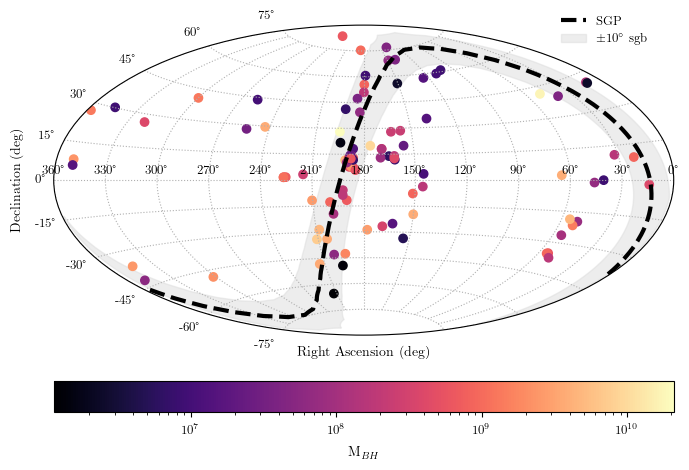

In [14]:
ra_rad = np.deg2rad(df['RA_deg']-180)
dec_rad = np.deg2rad(df['DEC_deg'])

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection="aitoff")  # Mollweide projection

# Create the scatter plot and save the mappable object
sc = ax.scatter(-ra_rad, dec_rad, c=df.M_BH, cmap='magma',norm = mpl.colors.LogNorm())
ax.plot(-rad_sgp+np.pi, dec_sgp, c='k', ls = '--', label='SGP')
ax.fill(np.concatenate([-(ra_sgp_down - np.pi), -(ra_sgp_up[::-1] - np.pi)]), 
        np.concatenate([dec_sgp_down, dec_sgp_up[::-1]]), 
        color='gainsboro', alpha=0.5, zorder = 0, label = '$\pm 10^{\circ}$ sgb')
# Add the colorbar linked to the scatter plot
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label(r'M$_{BH}$')

# Customize x-ticks for 0–360 degrees
xticks = np.radians(np.linspace(-180, 180, 13))  # Tick locations in radians
xtick_labels = [f"{int(x)}°" for x in np.linspace(360, 0, 13)]  # Tick labels in degrees
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)  # Set the tick labels

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.legend(frameon = False, bbox_to_anchor = (0.8,0.9))
ax.grid()
plt.savefig('plots/sources_mass.png')

Now we plot active and quiescent sources

In [15]:
mask_all_active = df['Activity'] == True

df_all_active = df[mask_all_active]
df_all_quiescent = df[~mask_all_active] 

/var/folders/fk/wtd7q1cd3dj875v4s60j7xvm0000gn/T/ipykernel_95247/3979871762.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colmap = cm.get_cmap('viridis')


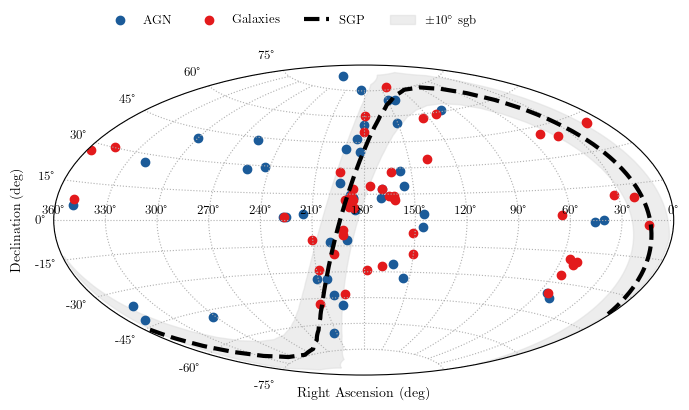

In [16]:
colmap = cm.get_cmap('viridis')

ra_rad_act = np.deg2rad(df_all_active['RA_deg']-180)
ra_rad_nonact = np.deg2rad(df_all_quiescent['RA_deg']-180)

dec_rad_act = np.deg2rad(df_all_active['DEC_deg'])
dec_rad_nonact= np.deg2rad(df_all_quiescent['DEC_deg'])

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection="aitoff")  # Mollweide projection

# Create the scatter plot and save the mappable object
sc = ax.scatter(-ra_rad_act, dec_rad_act, color = blues[0], label = "AGN")
sc = ax.scatter(-ra_rad_nonact, dec_rad_nonact,color = reds[1], label = "Galaxies")
ax.plot(-rad_sgp+np.pi, dec_sgp, c='k', ls = '--', label='SGP')
ax.fill(np.concatenate([-(ra_sgp_down - np.pi), -(ra_sgp_up[::-1] - np.pi)]), 
        np.concatenate([dec_sgp_down, dec_sgp_up[::-1]]), 
        color='gainsboro', alpha=0.5, zorder = 0, label = '$\pm 10^{\circ}$ sgb')
# Add the colorbar linked to the scatter plot
# cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.1)
# cbar.set_label(r'M$_{BH}$')

# Customize x-ticks for 0–360 grees
xticks = np.radians(np.linspace(-180, 180, 13))  # Tick locations in radians
xtick_labels = [f"{int(x)}°" for x in np.linspace(360, 0, 13)]  # Tick labels in degrees
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)  # Set the tick labels

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.legend(frameon = False, bbox_to_anchor = (0.7,1.2), ncols = 4)
ax.grid()
plt.savefig('plots/sources_active_nonactive.png')

In [17]:
x = [5.833454187531515, 9.73738513881546, 18.146220105185513, 33.208981524327946, 62.515858902124336, 136.85496128361848, 274.38234558085026, 513.726661709373, 669.2415126869699, 4122.572334480142, 2402.1725020153904, 768.6200227008646, 187.70013028574758, 67.11734985940886, 33.95817866816186, 6.71538119839216, 14.908617010967477, 45.69564451515092, 195.6752419647146, 492.5829341285078, 691.0048331481927]
y = [1057826.3973966069, 3022066.868901305, 9375731.258825535, 30334294.090381797, 108418601.31753786, 500065122.2210325, 1872856338.1680508, 6068440798.936903, 9855663405.5272, 10250021209.356781, 3762186125.8431077, 412023281.3203585, 25969986.983271673, 3565130.95979406, 1030908.7803277718, 1025163.6195478857, 4748956.098866938, 36702981.59483225, 675910648.5177383, 3752758180.5596094, 6971996902.984113]

/var/folders/fk/wtd7q1cd3dj875v4s60j7xvm0000gn/T/ipykernel_95247/3850987779.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 8000)


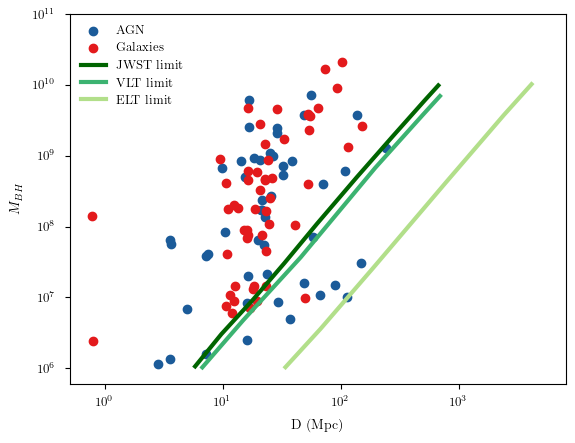

In [18]:
plt.scatter(df_all_active.D.values, df_all_active.M_BH.values, color = blues[0], label = 'AGN')
plt.scatter(df_all_quiescent.D.values, df_all_quiescent.M_BH.values, color = reds[1], label = 'Galaxies')
plt.xlabel('D (Mpc)')
plt.ylabel('$M_{BH}$')
plt.yscale('log')
plt.xscale('log')

# plt.axvline(x = 50, color = 'grey', ls = '--')
#define shaded region
x_shade = np.linspace(50,10000, 5)
y_shade_down = np.ones_like(x_shade)*1e5
y_shade_up = np.ones_like(x_shade)*1e12

plt.plot(x[:9], y[:9], lw = 3, color = greens[0], label = 'JWST limit')
plt.plot(x[-6:], y[-6:], lw = 3, color = greens[1], label = 'VLT limit')
plt.plot(x[9:-6], y[9:-6], lw = 3, color = greens[2], label = 'ELT limit')

plt.legend(frameon = False)

plt.xlim(0, 8000)
plt.ylim(6e5, 1e11)

plt.savefig('plots/sources_M_D_andlimits.png')

Now, we want to make the plot that goes into the paper, which contains:
* sources separated in Active and Galaxies
* Empty dots for excluded sources
* the SGP with +/-10 deg bands
* the PAO exposure

We start by defining the PAO exposure

In [19]:
import healpy as hp
# HEALPix parameters
nside = 32  # Resolution of the HEALPix grid (higher is finer)
npix = hp.nside2npix(nside)

# Observatory parameters
latitude = -35.2 * np.pi / 180  # Observatory latitude in radians
zenith_max = 80 * np.pi / 180  # Maximum zenith angle in radians
observation_years = 10  # Observation time in years
hours_per_day = 24
days_per_year = 365.25
total_hours = 1  # Total observation hours

# Generate HEALPix grid
theta, phi = hp.pix2ang(nside, np.arange(npix))  # HEALPix grid (theta: colatitude, phi: RA)
delta = np.pi / 2 - theta  # Declination
alpha = phi  # Right ascension

# Function to compute exposure for a single point on the sky
def compute_exposure(delta, alpha, latitude, zenith_max):
    # Calculate the cos of the zenith angle
    cos_zenith = np.sin(latitude) * np.sin(delta) + np.cos(latitude) * np.cos(delta) * np.cos(alpha)
    zenith_angle = np.arccos(np.clip(cos_zenith, -1, 1))
    
    # Determine if the direction is visible based on zenith angle
    visible = zenith_angle <= zenith_max
    return visible.astype(float)

# Integrated exposure
# Integrate over right ascension to account for Earth's rotation
exposure = np.zeros(npix)
n_alpha_steps = 360  # Number of RA steps for integration
alpha_steps = np.linspace(0, 2 * np.pi, n_alpha_steps)

for alpha_shift in alpha_steps:
    shifted_phi = (phi + alpha_shift) % (2 * np.pi)  # Rotate RA to simulate Earth's rotation
    exposure += compute_exposure(delta, shifted_phi, latitude, zenith_max)

# Normalize exposure and scale by total observation time
exposure *= total_hours / np.max(exposure)


In [20]:
import cmasher as cmr
from scipy.interpolate import griddata

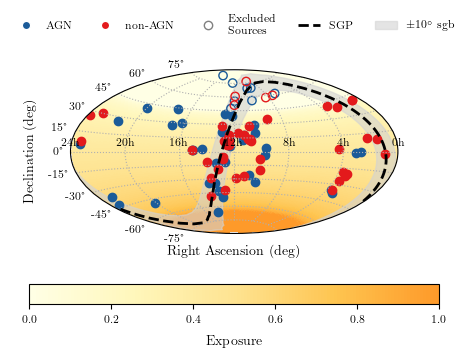

In [21]:
colmap = cmr.get_sub_cmap('YlOrBr', 0, 0.5)

ra_rad = np.deg2rad(df['RA_deg']-180)
alpha_plot = alpha - np.pi
dec_rad = np.deg2rad(df['DEC_deg'])

exp_min, exp_max = np.amin(exposure), np.amax(exposure)
exp_col = []
for e in exposure:
    exp_col.append(colmap((e-exp_min)/(exp_max-exp_min)))

plt.figure(figsize=(set_size('prx_wide', fraction=0.75, subplots=(1, 1))))
ax = plt.subplot(111, projection="aitoff")  # Mollweide projection

# Create the scatter plot and save the mappable object
for (r,d) in zip(ra_rad_act, dec_rad_act):
    if d>np.radians(44.8):
        ax.scatter(-r, d, edgecolor = blues[0], facecolor = 'none')

    else:
        ax.scatter(-r, d, color = blues[0])

for (r,d) in zip(ra_rad_nonact, dec_rad_nonact):
    if d>np.radians(44.8):
        ax.scatter(-r, d, edgecolor = reds[1], facecolor = 'none')

    else:
        ax.scatter(-r, d, color = reds[1])

# sc = ax.scatter(-ra_rad_nonact, dec_rad_nonact,color = reds[1], label = "non-AGN")
ax.plot(-rad_sgp+np.pi, dec_sgp, c='k', ls = '--', lw =2, label='SGP')
ax.fill(np.concatenate([-(ra_sgp_down - np.pi), -(ra_sgp_up[::-1] - np.pi)]), 
        np.concatenate([dec_sgp_down, dec_sgp_up[::-1]]), 
        color='lightgrey', alpha=0.6, zorder = 0, label = '$\pm 10^{\circ}$ sgb')

# Assume alpha_plot (RA) and delta (Dec) are 1D arrays of your source positions
# and exposure is the same shape
ra = -alpha_plot  # mirror for Aitoff
dec = delta

# Create a regular RA/Dec grid
ra_grid = np.linspace(-np.pi, np.pi, 500)
dec_grid = np.linspace(-np.pi/2, np.pi/2, 250)
RA, DEC = np.meshgrid(ra_grid, dec_grid)

# Interpolate exposure to the grid
exposure_grid = griddata((ra, dec), exposure, (RA, DEC), method='linear')

# Plot the colormap
im = ax.pcolormesh(RA, DEC, exposure_grid, shading='auto', cmap=colmap, zorder=-100)

ax = plt.gca()
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=colmap), ax=ax, pad=0.2,
                   orientation="horizontal")
cbar.set_label(r"Exposure")
cbar.ax.tick_params()


# Customize x-ticks for 0–360 degrees
xticks = np.radians(np.linspace(-180, 180, 7))  # Tick locations in radians
yticks = np.radians(np.linspace(-60, 60, 5)) 
ytick_labels = [f"{int(y)}°" for y in np.linspace(-60, 60, 5)]
xtick_labels = [f"{int(x)}h" for x in np.linspace(24, 0, 7)]  # Tick labels in degrees
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)  # Set the tick labels

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='AGN',
           markerfacecolor=blues[0], markersize=6),
    Line2D([0], [0], marker='o', color='w', label='non-AGN',
           markerfacecolor=reds[1], markersize=6),
    Line2D([0], [0], marker='o', color='grey', linestyle='None', label='Excluded\nSources',
           markerfacecolor='none', markersize=6),
    Line2D([0], [0], color='k', lw=2, linestyle='--', label='SGP'),
    Patch(facecolor='lightgrey', edgecolor='lightgrey', alpha=0.6,
          label=r'$\pm 10^{\circ}$ sgb'),
]

ax.legend(handles=legend_elements, frameon=False, loc = 'upper center', bbox_to_anchor=(0.5, 1.4), ncols=5)

ax.grid()
plt.savefig('plots/sources_and_exposure.pdf', dpi = 300)

Since we know there is an excess in the Centaurus region in PAO data, let's plot it and see how it looks in our Skymap

In [22]:
sgl_PAO = 162
sgb_PAO = -6

PAO_excess_coords = SkyCoord(sgl=sgl_PAO*u.deg, sgb=sgb_PAO*u.deg, frame = "supergalactic")
PAO_excess_eq = PAO_excess_coords.transform_to('icrs')

Let's look at the sources inside the PAO hotspot

In [23]:
i = 0
for r, d, n in zip(df.RA_deg.values, df.DEC_deg.values, df.Object.values):
    gcd = GreatCircleDistance(r,d, PAO_excess_eq.ra.degree, PAO_excess_eq.dec.degree, unit = 'deg')
    if gcd < np.deg2rad(27):
        i += 1
        print(i, n)
        print(f'{n} is {np.rad2deg(gcd):.2f} deg from the PAO hotspot')

1 Circinus Gala
Circinus Gala is 21.02 deg from the PAO hotspot
2 NGC 4945     
NGC 4945      is 5.26 deg from the PAO hotspot
3 NGC 4751     
NGC 4751      is 6.38 deg from the PAO hotspot
4 NGC 5328     
NGC 5328      is 17.77 deg from the PAO hotspot
5 NGC 5516     
NGC 5516      is 9.13 deg from the PAO hotspot
6 NGC 5128     
NGC 5128      is 2.36 deg from the PAO hotspot
7 IC 4296
IC 4296 is 11.63 deg from the PAO hotspot
8 NGC 3923     
NGC 3923      is 24.84 deg from the PAO hotspot
9 NGC 5018     
NGC 5018      is 25.98 deg from the PAO hotspot
10 NGC 5419     
NGC 5419      is 13.59 deg from the PAO hotspot


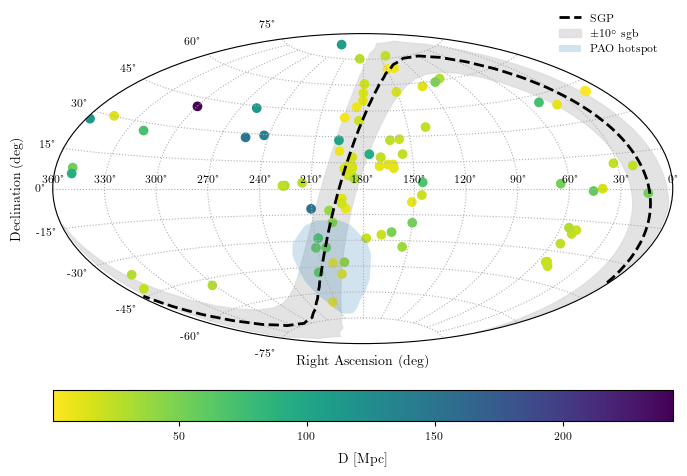

In [24]:
ra_rad = np.deg2rad(df['RA_deg']-180)
dec_rad = np.deg2rad(df['DEC_deg'])

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection="aitoff")  # Mollweide projection

# Create the scatter plot and save the mappable object
sc = ax.scatter(-ra_rad, dec_rad, c=df.D, cmap='viridis_r')
ax.plot(-rad_sgp+np.pi, dec_sgp, c='k', ls = '--', label='SGP')
ax.fill(np.concatenate([-(ra_sgp_down - np.pi), -(ra_sgp_up[::-1] - np.pi)]), 
        np.concatenate([dec_sgp_down, dec_sgp_up[::-1]]), 
        color='gainsboro', alpha=0.8, zorder = 0, label = '$\pm 10^{\circ}$ sgb')
# Add the colorbar linked to the scatter plot
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label(r'D [Mpc]')
circle = plt.Circle((-PAO_excess_eq.ra.rad+np.pi, PAO_excess_eq.dec.rad ), np.radians(27), edgecolor = 'None', facecolor = 'C0', alpha = 0.2, label = 'PAO hotspot')
ax.add_patch(circle)

# Customize x-ticks for 0–360 degrees
xticks = np.radians(np.linspace(-180, 180, 13))  # Tick locations in radians
xtick_labels = [f"{int(x)}°" for x in np.linspace(360, 0, 13)]  # Tick labels in degrees
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)  # Set the tick labels

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.legend(frameon = False, bbox_to_anchor = (0.8,0.9))
ax.grid()
plt.savefig('plots/sources_with_PAO_hotspot.png')

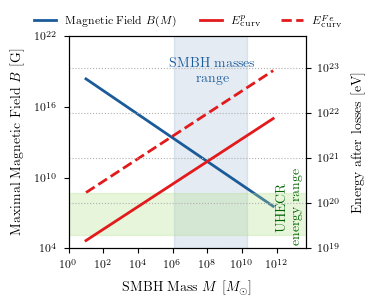

In [25]:
# Constants in cgs
m_p = 1.6726219e-24        # proton mass [g]
c = 2.99792458e10          # speed of light [cm/s]
e = 4.80320425e-10         # elementary charge [statC]
G = 6.67430e-8             # gravitational constant [cm^3 g^-1 s^-2]
M_sun = 1.98847e33         # solar mass [g]
erg_to_eV = 6.241509e11    # conversion factor [eV / erg]

# Parameters
a = 1     # acceleration efficiency
Z = 1     # charge number (proton)
Z_fe = 26
# Black hole mass range: 10^6 - 10^10 solar masses
M_vals = np.logspace(1, 11.8, 200) * M_sun  # [g]

# Planck-limited magnetic field: B(M) = c^4 / (G^{3/2} M)
B_vals = c**4 / (G**1.5 * M_vals)         # [G]
# Synchrotron losses
numerator = 3 * a * m_p**4 * c**8
denominator = 2 * (Z * e)**3 * B_vals
E_sync_erg = np.sqrt(numerator / denominator)
E_sync_eV = E_sync_erg * erg_to_eV
E_sync_PeV = E_sync_eV * 1e-15
denominator_fe = 2 * (Z_fe * e)**3 * B_vals

E_sync_erg_fe = np.sqrt(numerator / denominator_fe)
E_sync_eV_fe = E_sync_erg_fe * erg_to_eV
E_sync_PeV_fe = E_sync_eV_fe * 1e-15

# curvature losses 
R_s = 2 * G * M_vals / c**2 
numerator_curv = 3 * a * m_p**4 * c**8 * B_vals * R_s**2
numerator_curv_fe = 3 * a * (m_p*26)**4 * c**8 * B_vals * R_s**2
denominator_curv = 2 * Z * e
denominator_curv_fe = 2 * Z_fe * e
E_curv_erg = (numerator_curv / denominator_curv)**0.25
E_curv_eV = E_curv_erg * erg_to_eV
E_curv_PeV = E_curv_eV

E_curv_erg_fe = (numerator_curv_fe / denominator_curv_fe)**0.25
E_curv_eV_fe = E_curv_erg_fe * erg_to_eV
E_curv_PeV_fe = E_curv_eV_fe

# Plotting
fig, ax1 = plt.subplots(1,1, figsize = set_size('prx_column', fraction=0.9, ratio = 0.9, subplots=(1, 1)))

# Left y-axis: Magnetic field
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(M_vals / M_sun, B_vals/10**4, color = blues[0], lw = 2, label='Magnetic Field $B(M)$')
ax1.set_xlabel('SMBH Mass $M$ [$M_\\odot$]')
ax1.set_ylabel('Maximal Magnetic Field $B$ [G]')
ax1.tick_params(axis='y')
ax1.fill_betweenx([10**-2, 10**19], np.amin(df.M_BH), np.amax(df.M_BH), color = blues[2], alpha = 0.2)
ax1.set_ylim(1,1e18)
ax1.set_yticks(np.logspace(0,18,4))
ax1.set_yticklabels(['$10^4$', '$10^{10}$', '$10^{16}$', '$10^{22}$'])
ax1.text(2*10**(8), 1e15, 'SMBH masses\nrange', color = blues[0],ha='center', va='center')
handle, label = ax1.get_legend_handles_labels()

ax2 = ax1.twinx()
ax2.set_yscale('log')
ax2.plot(M_vals / M_sun, E_curv_PeV, color = reds[1], label=r'$E_{\mathrm{curv}}^{p}$')
ax2.plot(M_vals / M_sun, E_curv_PeV_fe, color = reds[1], ls = '--', label=r'$E_{\mathrm{curv}}^{Fe}$', zorder = -10)
ax2.fill_between( [1, 10**15],20000e15, 166000e15, color = greens[2], alpha = 0.3)
ax2.set_ylabel('Energy after losses [eV]')
ax2.tick_params(axis='y')
ax2.set_ylim(1e19,5e23)
ax2.set_yticks(np.logspace(19,23, 5))
ax2.set_xlim(1, 5*10**13)
ax2.text(5*10**12,80000e15 , 'UHECR\nenergy range',rotation=90, color = greens[0],ha='center', va='center')
handle2, label2 = ax2.get_legend_handles_labels()
handle.extend(handle2)
label.extend(label2)
plt.legend(handles=handle, frameon = False, ncols = 3, bbox_to_anchor=(0.5, 1.15), loc='upper center')
plt.minorticks_off()
plt.grid(True)
plt.savefig('plots/B_vs_M_vs_E_no_sync.pdf')


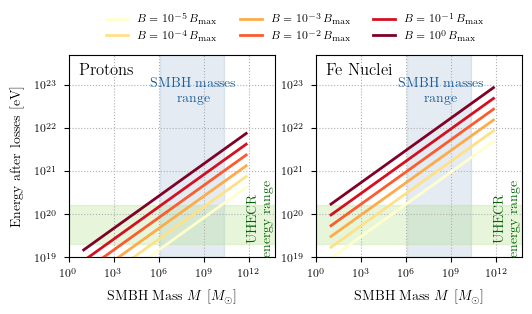

In [26]:
# Constants in cgs
m_p = 1.6726219e-24        # proton mass [g]
c = 2.99792458e10          # speed of light [cm/s]
e = 4.80320425e-10         # elementary charge [statC]
G = 6.67430e-8             # gravitational constant [cm^3 g^-1 s^-2]
M_sun = 1.98847e33         # solar mass [g]
erg_to_eV = 6.241509e11    # conversion factor [eV / erg]

# Parameters
a = 1     # acceleration efficiency
Z = 1     # charge number (proton)
Z_fe = 26
# Black hole mass range: 10^6 - 10^10 solar masses
M_vals = np.logspace(1, 11.8, 200) * M_sun  # [g]

# Planck-limited magnetic field: B(M) = c^4 / (G^{3/2} M)
B_vals = c**4 / (G**1.5 * M_vals)         # [G]


def Energy_curv(i, Mass):
    M_vals = np.logspace(1, 11.8, 200) * M_sun  # [g]
    B_vals = c**4 / (G**1.5 * M_vals)    
    R_s = 2 * G * M_vals / c**2 
    numerator_curv = 3 * a * (Mass*m_p)**4 * c**8 * i*B_vals * R_s**2
    denominator_curv = 2 * Mass * e
    E_curv_erg = (numerator_curv / denominator_curv)**0.25
    E_curv_eV = E_curv_erg * erg_to_eV
    return E_curv_eV

import matplotlib as mpl

cmap = mpl.colormaps['YlOrRd']

# Take colors at regular intervals spanning the colormap.
range = np.logspace(-5, 0, 6)
linrange = np.linspace(0,1,6)

# Plotting
fig, (ax1,ax2) = plt.subplots(1,2, figsize = set_size('text', fraction=0.9, ratio = 0.9, subplots=(1, 2)))

# Left y-axis: Magnetic field
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel('SMBH Mass $M$ [$M_\\odot$]')
ax1.tick_params(axis='y')
ax1.fill_betweenx([1e19, 10e23], np.amin(df.M_BH), np.amax(df.M_BH), color = blues[2], alpha = 0.2)
ax1.grid(True)
ax1.text(2*10**(8), 7e22, 'SMBH masses\nrange', color = blues[0],ha='center', va='center')
handle, label = ax1.get_legend_handles_labels()

for i, j in zip(range, linrange):
    E_curv_eV = Energy_curv(i, 1)
    E_curv_eV_Fe = Energy_curv(i, 26)
    str_label = str(f'{np.log10(i):.0f}')
    ax1.plot(M_vals / M_sun, E_curv_eV, color = cmap(j), label=fr"$B = 10^{{{str_label}}}\,B_{{\mathrm{{max}}}}$")

ax1.fill_between( [1, 10**15],20000e15, 166000e15, color = greens[2], alpha = 0.3)
ax1.set_ylabel('Energy after losses [eV]')
ax1.tick_params(axis='y')
ax1.set_ylim(1e19,5e23)
ax1.set_yticks(np.logspace(19,23, 5))
ax1.set_xlim(1, 5*10**13)
ax1.text(5*10**12,80000e15 , 'UHECR\nenergy range',rotation=90, color = greens[0],ha='center', va='center')
ax1.legend(frameon = False, ncols = 3, bbox_to_anchor=(1.1, 1.25), loc='upper center')
ax1.minorticks_off()

# Left y-axis: Magnetic field
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.set_xlabel('SMBH Mass $M$ [$M_\\odot$]')
ax2.tick_params(axis='y')
ax2.fill_betweenx([1e19, 10e23], np.amin(df.M_BH), np.amax(df.M_BH), color = blues[2], alpha = 0.2)
ax2.grid(True)
# plt.legend(frameon = False, loc = 'upper left')
ax2.text(2*10**(8), 7e22, 'SMBH masses\nrange', color = blues[0],ha='center', va='center')
handle, label = ax1.get_legend_handles_labels()
# Right y-axis: Synchrotron energy

for i, j in zip(range, linrange):
    E_curv_eV = Energy_curv(i, 1)
    E_curv_eV_Fe = Energy_curv(i, 26)
    ax2.plot(M_vals / M_sun, E_curv_eV_Fe, color = cmap(j))
ax2.fill_between( [1, 10**15],20000e15, 166000e15, color = greens[2], alpha = 0.3)
# ax2.set_ylabel('Energy after losses [eV]')
ax2.tick_params(axis='y')
ax2.set_ylim(1e19,5e23)
ax2.set_yticks(np.logspace(19,23, 5))
ax2.set_xlim(1, 5*10**13)
ax2.text(5*10**12,80000e15 , 'UHECR\nenergy range',rotation=90, color = greens[0],ha='center', va='center')
ax2.minorticks_off()
ax1.text(0.05, 0.9, 'Protons', transform=ax1.transAxes, fontsize=12)
ax2.text(0.05, 0.9, 'Fe Nuclei', transform=ax2.transAxes, fontsize=12)
plt.savefig('plots/Energy_in_not_maximal_conditions.pdf')
